In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Results

In [6]:
path = '/mnt/researchdrive/BOX_INTERNAL/opotowsky/processed_results/'

In [21]:
d2 = pd.read_pickle(path+'reactor_randerr_mll_scikit_compare_BalAcc.pkl')

In [22]:
d2#.loc[:, ('knn', 'Neg MAPE')]

Algorithm               knn                       dtree            \
Metric    Balanced Accuracy BalAcc CI Balanced Accuracy BalAcc CI   
0.0                0.998548  0.000057          0.999268  0.000040   
0.3                0.998403  0.000060          0.998534  0.000057   
0.7                0.998121  0.000065          0.997575  0.000073   
1.0                0.997507  0.000074          0.996893  0.000083   
2.0                0.994243  0.000113          0.993153  0.000123   
4.0                0.982283  0.000197          0.981302  0.000202   
5.0                     NaN       NaN               NaN       NaN   
6.0                0.965400  0.000272          0.963596  0.000279   
8.0                0.946805  0.000334          0.944782  0.000340   
10.0               0.927653  0.000386          0.928491  0.000384   
13.0               0.897698  0.000452          0.905805  0.000435   
15.0                    NaN       NaN               NaN       NaN   
17.0               0.860262  0.000517          0.877452  0.000489   
20.0               0.831010  0.000558          0.857490  0.000521   

Algorithm               mll            
Metric    Balanced Accuracy BalAcc CI  
0.0                     NaN       NaN  
0.3                     NaN       NaN  
0.7                     NaN       NaN  
1.0                0.989560  0.000151  
2.0                     NaN       NaN  
4.0                     NaN       NaN  
5.0                0.989510  0.000152  
6.0                     NaN       NaN  
8.0                     NaN       NaN  
10.0               0.989023  0.000155  
13.0                    NaN       NaN  
15.0               0.986490  0.000172  
17.0                    NaN       NaN  
20.0               0.969692  0.000255

# Plotting

In [25]:
# color dict (use: colors['XColor'])
import ast
with open('color_palette.txt', 'r') as file:
    contents = file.read()
    colors = ast.literal_eval(contents)

In [23]:
def plot_curves(title, pred, metric): 
    
    df = pd.read_pickle(path + pred +'_randerr_mll_scikit_compare_' + metric + '.pkl')
    
    plt.clf()    
    fig = plt.figure(figsize=(7,6))
    ax = fig.add_subplot(111)   
    ax.set_title(title, fontsize=20, pad=15)
    
    sv_base = 'plots/randerr_compare_nuc29'
    
    axlbls = {'MAE' : 'Negative MAE', 
              'MedAE' : 'Negative MedAE', 
              'MAPE' : 'Negative MAPE', 
              'Acc' : 'Accuracy Score',
              'BalAcc' : 'Balanced Accuracy Score'
             }
    dflbls = {'MAE' : 'Neg MAE', 
              'MedAE' : 'Neg MedAE', 
              'MAPE' : 'Neg MAPE', 
              'Acc' : 'Accuracy',
              'BalAcc' : 'Balanced Accuracy'
             }
    fb = {'MAE' : 'MAE Std', 
          #'MedAE' : ('MedAE IQR_25', 'MedAE IQR_75'), # Need to work on this
          'MAPE' : 'MAPE Std', 
          'Acc' : 'Acc CI',
          'BalAcc' : 'BalAcc CI'}
    
    err_axlbl = 'Negative ' + metric
    if 'Burnup' in title:
        axlbl = axlbls[metric] + ' [MWd/MTU]'
        sv_fig = sv_base + '_burn.png'
    elif 'Reactor' in title:
        axlbl = axlbls[metric]
        sv_fig = sv_base + '_rxtr.png'
    elif 'Enrichment' in title:
        axlbl = axlbls[metric] + ' [% U235]'
        sv_fig = sv_base + '_enri.png'
    else:
        axlbl = axlbls[metric] + ' [days]'
        sv_fig = sv_base + '_cool.png'
    ax.set_xlabel('Percent Error', fontsize=20, labelpad=15)
    ax.set_ylabel(axlbl, fontsize=20, labelpad=15) 
    
    lbls = ['kNN', 'Dec Tree', 'MLL Calc']
    dotc = ['MBrwn', 'MTeal', 'MPurp']
    fillc = ['DBrwn', 'DTeal', 'DPurp']
    err = df.index.tolist()
    for i, alg in enumerate(['knn', 'dtree', 'mll']):
        x = df.loc[:, (alg, dflbls[metric])]
        ebar = df.loc[:, (alg, fb[metric])]
        ax.fill_between(err, x - ebar, x + ebar, color=colors[fillc[i]], alpha=0.3)
        ax.plot(err, x, 'o-', color=colors[dotc[i]], mew=0, ms=5, label=lbls[i])
    #mll = np.array(mll)
    
    ax.tick_params(labelsize=14)
    #h,l = ax.get_legend_handles_labels()
    #handles = [h[0], h[2], h[4], h[1], h[3], h[5], h[6]]
    #labels = [l[0], l[2], l[4], l[1], l[3], l[5], l[6]]
    #ax.legend(handles,labels,loc='best')
    ax.legend(loc='lower left')
    
    #if 'Reactor' in title:
    #    ax.set_ylim(None, 1.09)
    #elif 'Burnup' in title:
    #    ax.set_ylim(None, 250)
    #elif 'Enrichment' in title:
    #    ax.set_ylim(None, 0.049)
    #else:
    #    ax.set_ylim(None, 149)
    plt.show()
    
    #fig.savefig(sv_fig, bbox_inches='tight', transparent=True)

## Reactor Type

<Figure size 432x288 with 0 Axes>

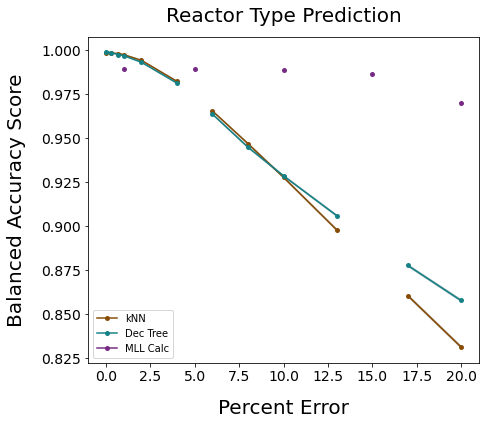

In [26]:
plot_curves('Reactor Type Prediction', 'reactor', 'BalAcc')

<Figure size 432x288 with 0 Axes>

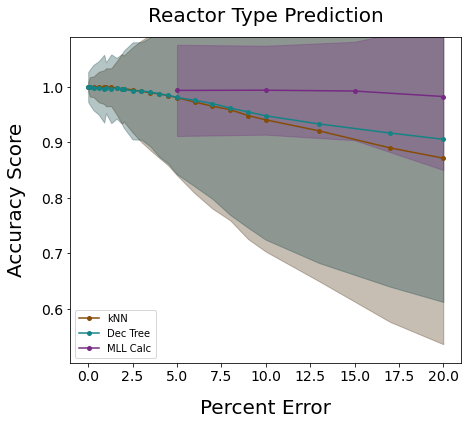

In [13]:
plot_curves('Reactor Type Prediction', 'reactor', 'BalAcc')

## Burnup

<Figure size 432x288 with 0 Axes>

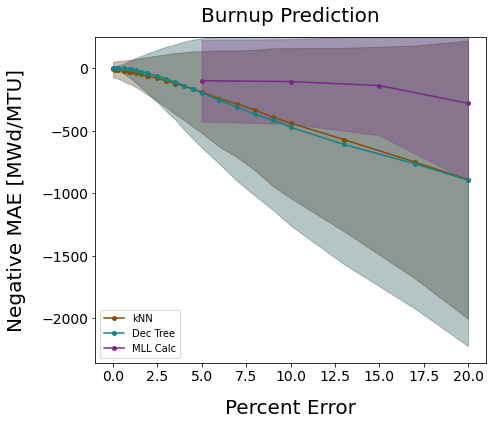

In [15]:
plot_curves('Burnup Prediction')

<Figure size 432x288 with 0 Axes>

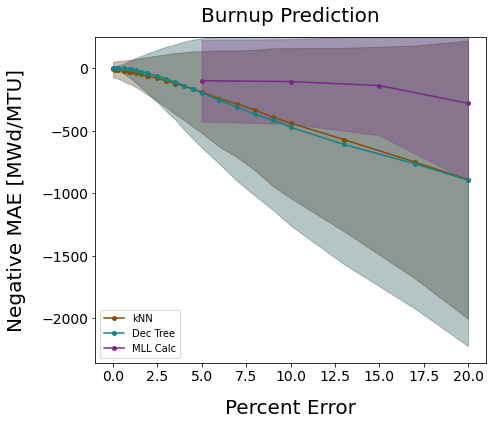

In [15]:
plot_curves('Burnup Prediction')

## Enrichment

<Figure size 432x288 with 0 Axes>

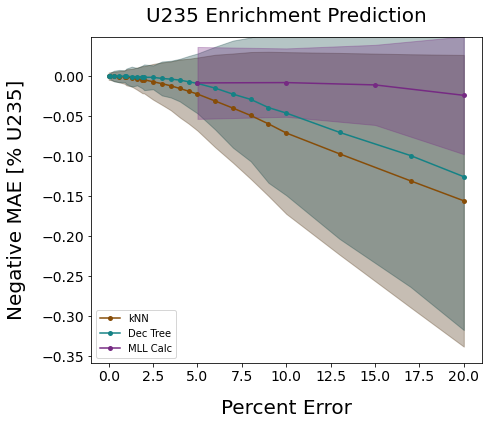

In [17]:
plot_curves('U235 Enrichment Prediction')

<Figure size 432x288 with 0 Axes>

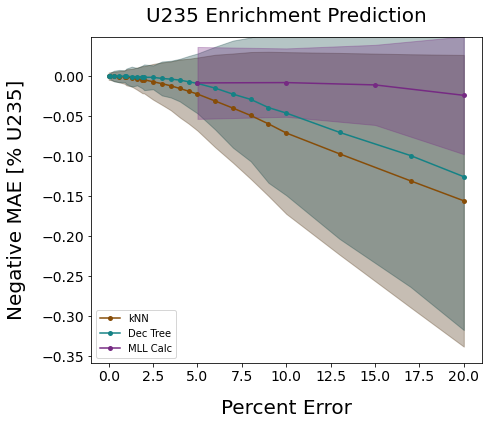

In [17]:
plot_curves('U235 Enrichment Prediction')

## Time Since Irraditation

<Figure size 432x288 with 0 Axes>

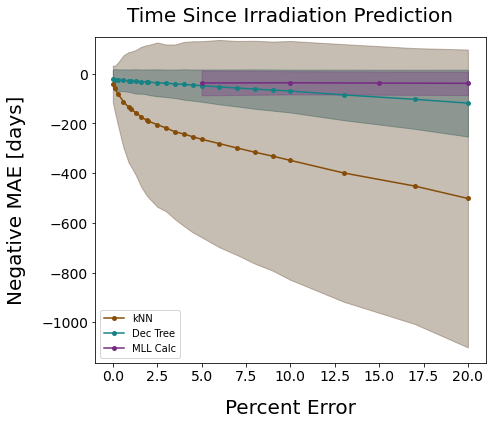

In [21]:
plot_curves('Time Since Irradiation Prediction')

<Figure size 432x288 with 0 Axes>

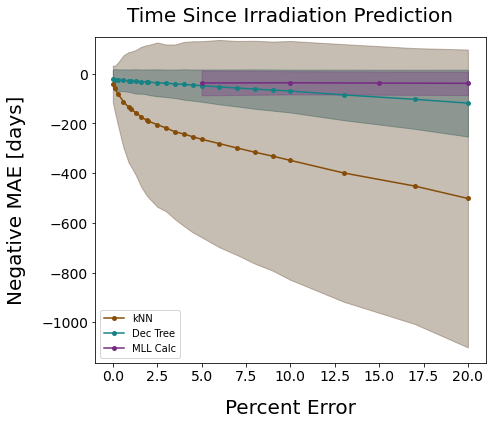

In [21]:
plot_curves('Time Since Irradiation Prediction')